<a href="https://colab.research.google.com/github/MattJCR/Red-Neuronal-Keras/blob/master/Red_Neuronal_Keras_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE APRENDIZAJE SUPERVISADO: KNN - WINE QUALITY**
Clasificación de la calidad del vino según alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

In [ ]:
#@title Importación de librerías
import pandas as pd
import urllib.request
import tempfile
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statistics
import warnings
warnings.filterwarnings('ignore')
# Descargar clase Preprocessing para el tratado del dataset
urllib.request.urlretrieve('https://raw.githubusercontent.com/MattJCR/Algoritmo-KNN/master/Preprocessing.py', 'Preprocessing.py')
from Preprocessing import CleanData as cd

In [ ]:
#@title Obtención del dataset

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/MattJCR/Algoritmo-KNN/master/dataset/WineQT.csv'

# Descargar el archivo CSV
response = urllib.request.urlopen(url)

# Crear un archivo temporal para guardar el archivo CSV descargado
temp = tempfile.NamedTemporaryFile()

# Escribir los datos descargados en el archivo temporal
temp.write(response.read())

# Mover el puntero al inicio del archivo
temp.seek(0)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(temp)

# Cerrar el archivo temporal
temp.close()

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
#@title Mostrado de primeras lineas del dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#@title Mostrado de ultimas lineas del dataset
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [ ]:
#@title Obtener el resumen estadístico del DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

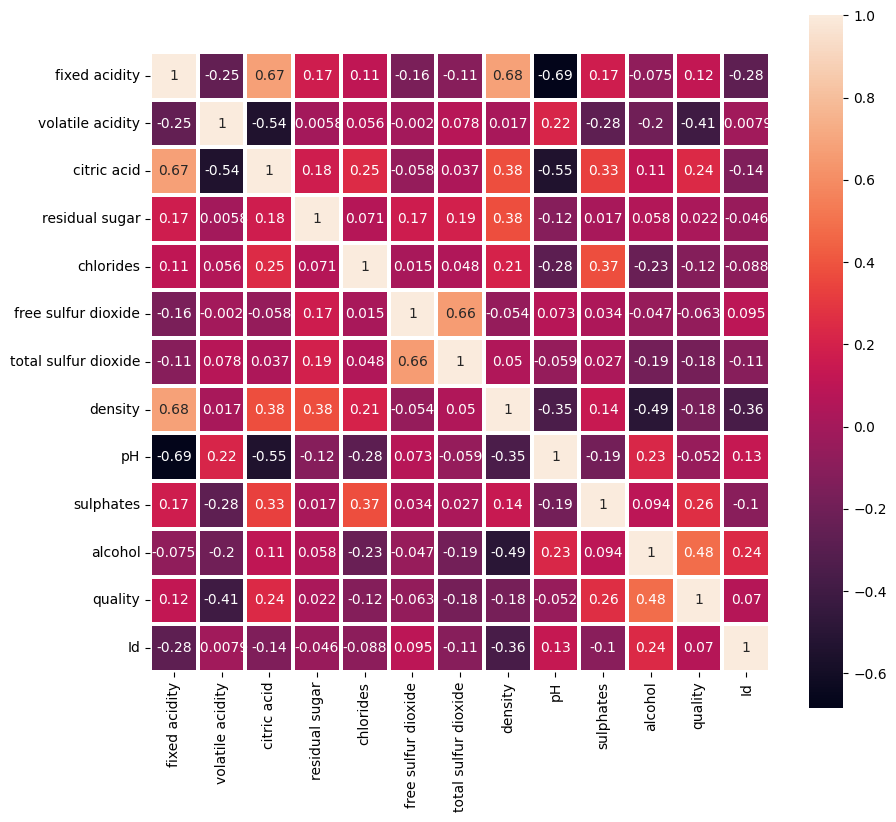

In [ ]:
#@title Mostrar un mapa de calor que indique la correlación entre variables
# Calcular la correlación entre las variables del DataFrame
corr = df.corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(10, 9))
sns.heatmap(corr,square=True,annot=True,linewidths=1.5)
plt


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

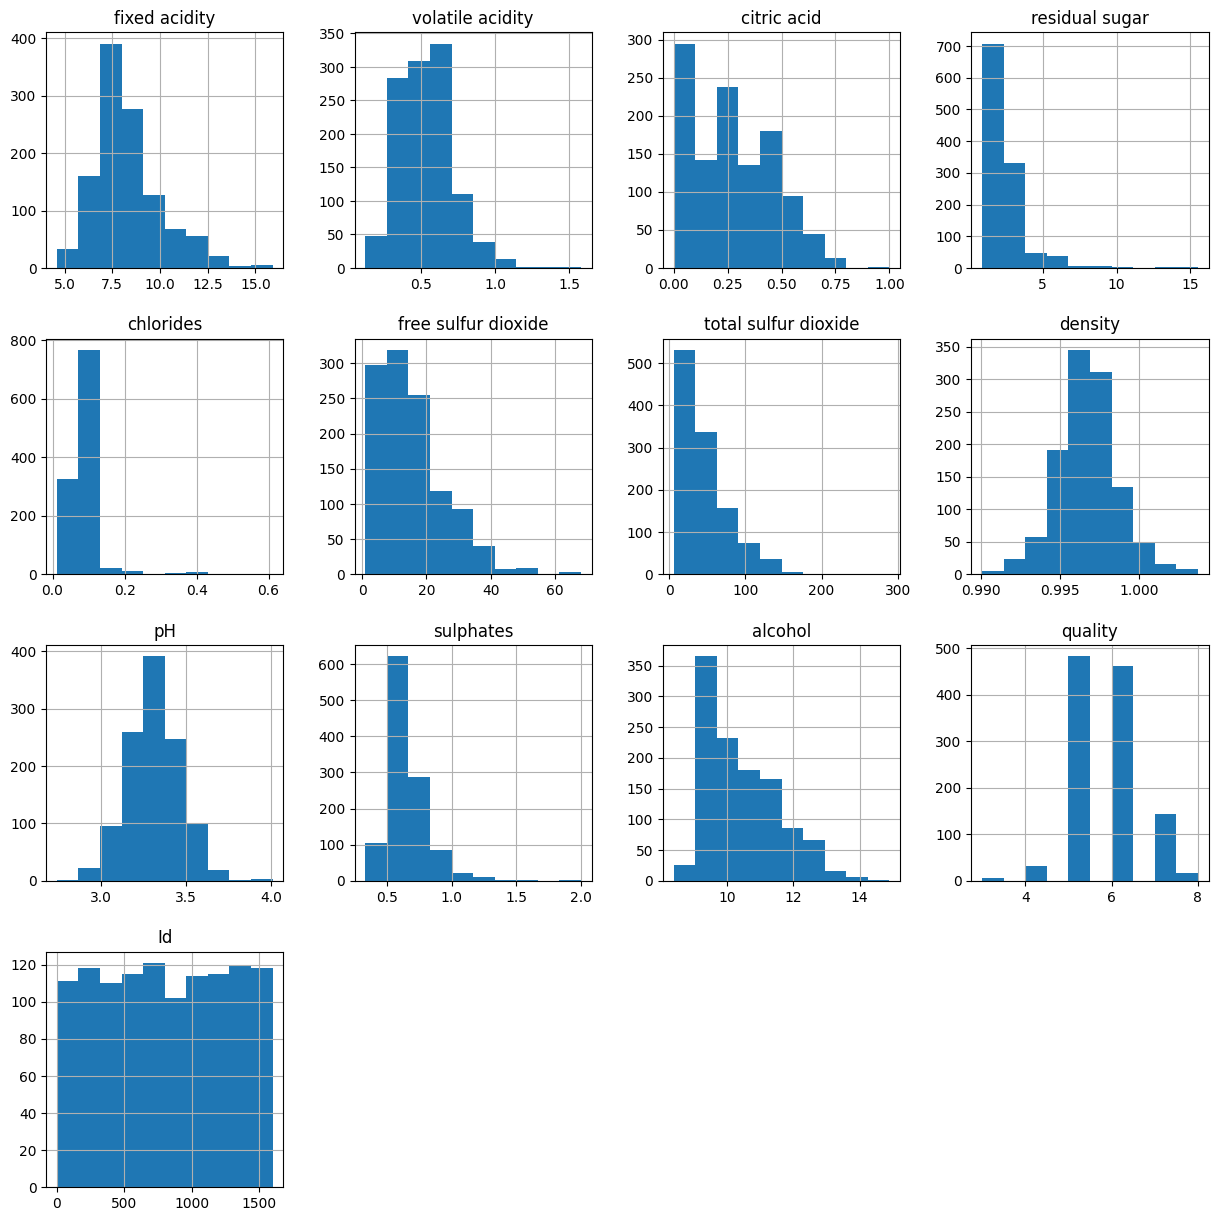

In [ ]:
# Análisis examinando los histogramas de las propiedades numéricas para tener una visión general de las distribuciones.
import matplotlib.pyplot as plt
df.hist(ax = plt.figure(figsize = (15, 15)).gca())

## **Seleccionar las características a tener en cuenta en el estudio**
Para este estudio vamos a seleccionar las propiedades que tengan una relacion por encima de 0.5 y por debajo de -0.5 basandonos en el mapa de calor.

Por tanto vamos a eliminar las siguientes columnas:
* residual sugar
* chlorides
* sulphates
* Id

Vamos a mantener las siguientes columnas pese a no cumplir con la relación:
* alchohol (Mantenemos esta columna ya que es bastante proxima a 0.5 y -0.5)
* quality (Es la columna a predecir)

In [ ]:
#@title Eliminación de columnas innecesarias y preprocesamiento de datos

# Limpiado de datos
df = cd.clean(df)

# Borrado de columnas
df = df.drop('residual sugar',axis=1)
df = df.drop('chlorides',axis=1)
df = df.drop('sulphates',axis=1)
df = df.drop('id',axis=1)

df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,ph,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,9.4,5
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,9.8,5
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,9.8,5
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,9.8,6
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,9.4,5
...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,11.0,6
1139,6.8,0.620,0.08,28.0,38.0,0.99651,3.42,9.5,6
1140,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,10.5,5
1141,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,11.2,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,ph,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,15.615486,45.914698,0.996730,3.311015,10.442111,5.657043
std,1.747595,0.179633,0.196686,10.250486,32.782130,0.001925,0.156664,1.082196,0.805824
min,4.600000,0.120000,0.000000,1.000000,6.000000,0.990070,2.740000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,7.000000,21.000000,0.995570,3.205000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,13.000000,37.000000,0.996680,3.310000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,21.000000,61.000000,0.997845,3.400000,11.100000,6.000000
max,15.900000,1.580000,1.000000,68.000000,289.000000,1.003690,4.010000,14.900000,8.000000


In [ ]:
#@title Separar datos entre datos de entrada y etiquetas (resultados)

# Obtenemos la columna quality
df_quality = df['quality']

# Eliminamos la columna quality del dataframe
df = df.drop('quality',axis=1)

In [ ]:
#@title Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)

x_train,x_test,y_train, y_test = train_test_split(df,df_quality,random_state=1,train_size=0.75)

In [ ]:
from keras.utils import to_categorical
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# **Entrenamiento y predicción**

Numero de entradas: 8


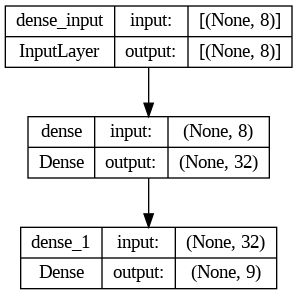

In [ ]:
#@title Implementa una red neuronal para realizar las predicciones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras. initializers import TruncatedNormal 
# Definimos el modelo de Keras
model = Sequential()
input_shape = len(x_train.columns)
init = TruncatedNormal(stddev=0.01, seed=1)
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(x_train.columns)*4), input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(int(len(y_train[0])), activation='softmax', kernel_initializer=init))

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#@title Compilamos el modelo y definimos los callbacks para evitar el sobreentrenamiento
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import math

# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Definir early stopping
early_stop = EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)

batch_size=int(math.sqrt(len(x_train)))
print("batch_size:",batch_size)

# Entrenar el modelo con reducción del learning rate
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size: 29
Epoch 1/1000
30/30 [==============================] - 3s 29ms/step - loss: 1.7148 - accuracy: 0.4096 - val_loss: 1.2604 - val_accuracy: 0.5280 - lr: 0.0100
Epoch 2/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.2148 - accuracy: 0.4889 - val_loss: 1.1459 - val_accuracy: 0.5385 - lr: 0.0100
Epoch 3/1000
30/30 [==============================] - 0s 8ms/step - loss: 1.2276 - accuracy: 0.4644 - val_loss: 1.1502 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/1000
30/30 [==============================] - 0s 5ms/step - loss: 1.2064 - accuracy: 0.4947 - val_loss: 1.1229 - val_accuracy: 0.5455 - lr: 0.0100
Epoch 5/1000
30/30 [==============================] - 0s 7ms/step - loss: 1.1657 - accuracy: 0.4959 - val_loss: 1.1097 - val_accuracy: 0.5385 - lr: 0.0100
Epoch 6/1000
30/30 [==============================] - 0s 7ms/step - loss: 1.1529 - accuracy: 0.4994 - val_loss: 1.1054 - val_accuracy: 0.5664 - lr: 0.0100
Epoch 7/1000
30/30 [==============================] - 

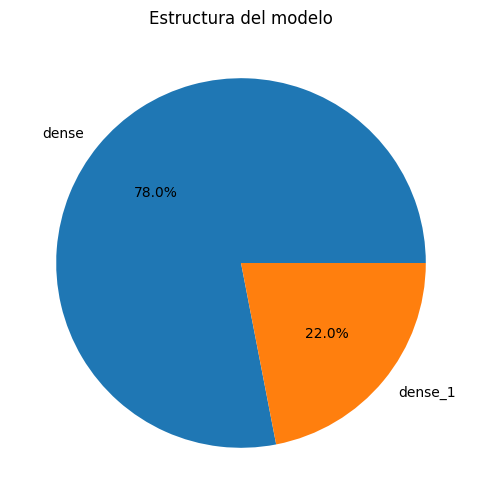

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
#@title Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

9/9 [==============================] - 0s 3ms/step - loss: 0.8686 - accuracy: 0.6294
Pérdida del modelo en los datos de prueba: 0.8686
Precisión del modelo en los datos de prueba: 0.6294


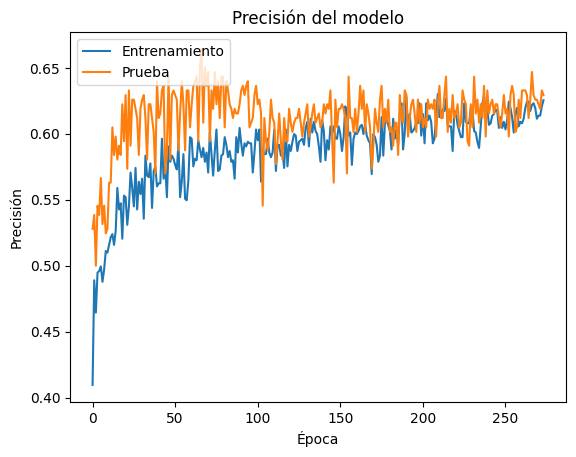

In [ ]:
#@title Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

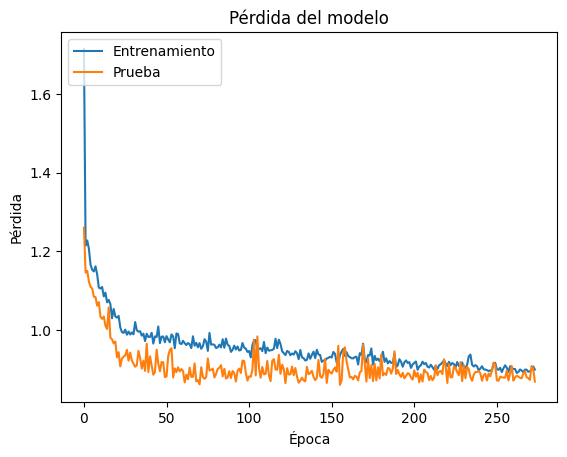

In [ ]:
#@title Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

# **Conclusiones**

En este estudio se ha analizado la clasificación de la calidad del vino utilizando redes neuronales con KERAS. Se ha usado un conjunto de datos que incluye información sobre vinos y su calidad evaluada en una escala de 0 a 10. Se ha limpiado y procesado el conjunto de datos utilizando una clase llamada Preprocessing.py, que permite eliminar filas con valores nulos, rellenar valores nulos con la media, eliminar columnas no deseadas, convertir el nombre de las columnas a minúsculas y convertir las columnas del DataFrame a los tipos adecuados (numérico, fecha o cadena de caracteres).

Se ha calculado la correlación entre las variables del DataFrame y se ha visualizado mediante un mapa de calor. A partir de este análisis, se han seleccionado las características que se han usado en el estudio en base a la correlación entre ellas, eliminando aquellas que no cumplen con una relación por encima de 0.5 y por debajo de -0.5. Los datos se han separado en datos de entrada y calidades y se han dividido en un conjunto de entrenamiento y un conjunto de prueba, utilizando un 75% y un 25% respectivamente.


Finalmente, se han seleccionado los parámetros que han dado la mejor media de puntuación para el modelo (accuracy) que han dado la media (0.62).

En base a los resultados obtenidos, se pueden hacer las siguientes conclusiones:

* La optimización de la red neuronal es un proceso importante para mejorar el rendimiento de un modelo de aprendizaje automático.

* La correlación entre las variables del DataFrame es un factor a tener en cuenta a la hora de seleccionar las características a utilizar en el estudio.
